## This notebook looks to read an image and bound the ID. The bounded ID is padded, thresholded and cleaned. 

In [1]:
from google.cloud import vision
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import rotate
from skimage.draw import polygon

from helpers.corrections import *
from helpers.image_loading import * 
from helpers.handling import *
from helpers.identity_isolation import * 

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"../guppies-test-4c48569421d8.json"
client = vision.ImageAnnotatorClient()

In [2]:
random_files = ListAvaliableFiles('guppy_images', prefix='Manually_Labelled/New', verbose=False)
np.random.shuffle(random_files)

* pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:0
character: * upper height: 424 lower height: 246
M pageno:0 blockno:1 paragraphno:0 wordno:0 symbolno:0
character: M upper height: 441 lower height: 322
L pageno:0 blockno:1 paragraphno:0 wordno:0 symbolno:1
character: L upper height: 441 lower height: 322
L pageno:0 blockno:1 paragraphno:0 wordno:0 symbolno:2
character: L upper height: 441 lower height: 322
Z pageno:0 blockno:1 paragraphno:1 wordno:0 symbolno:0
character: Z upper height: 663 lower height: 503
F pageno:0 blockno:1 paragraphno:1 wordno:0 symbolno:1
character: F upper height: 661 lower height: 501
4 pageno:0 blockno:1 paragraphno:1 wordno:0 symbolno:2
character: 4 upper height: 660 lower height: 500
R pageno:0 blockno:1 paragraphno:1 wordno:0 symbolno:3
character: R upper height: 659 lower height: 499
6 pageno:0 blockno:1 paragraphno:1 wordno:1 symbolno:0
character: 6 upper height: 813 lower height: 690
/ pageno:0 blockno:1 paragraphno:1 wordno:1 symbolno:1
character

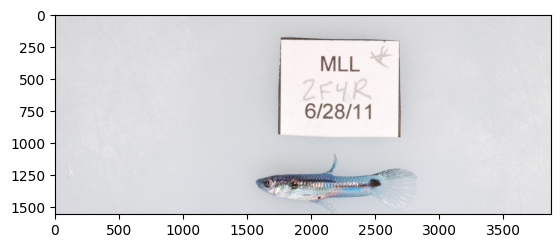

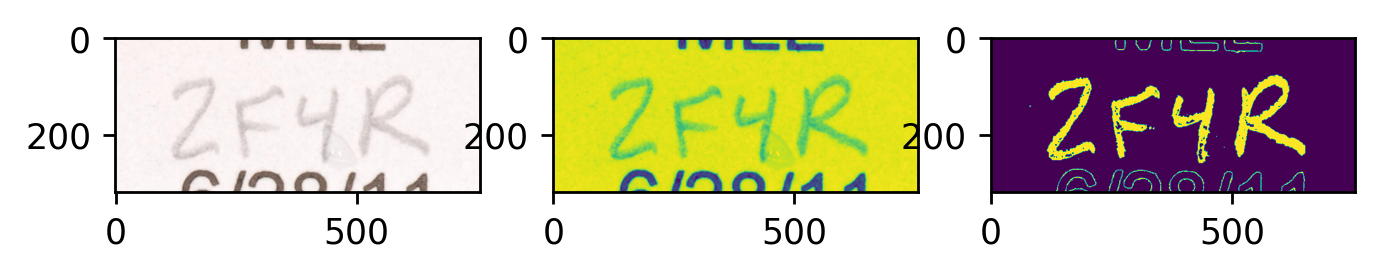

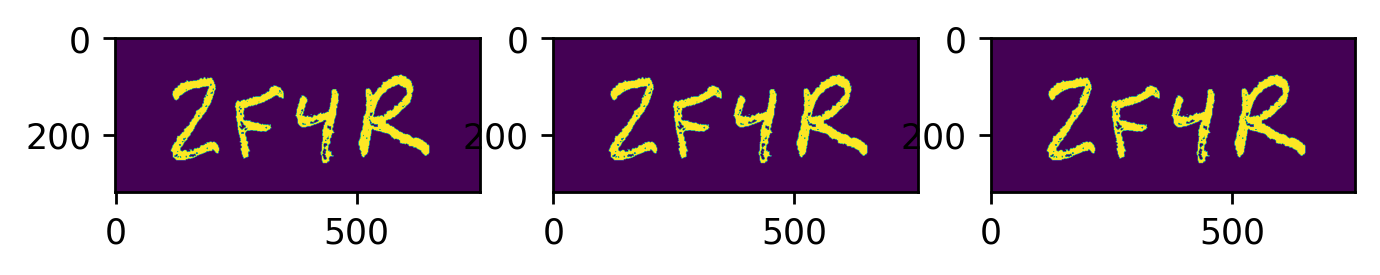

In [19]:
# Collect image from bucket
image_in_bytes = RetreiveImage(random_files[81])

# Read image and return initial output, frame and identity character boxes
output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=True)

# Collect character boxes into a singe ID box.
identity_box = combine_boxes(character_boxes, added_length=100)

padx = 100
pady = 80
# Reduce the image to just the ID
reduced_frame = reduce_image(frame, identity_box, padx=padx, pady=pady)

# Mask and remove for final image
masked_image = mask_and_remove(reduced_frame, verbose = True)

if len(character_boxes) == 3:
    final_image = remove_deltas(masked_image, width=15, padx=padx + 100, pady=pady//2, verbose = True)

else:
# Remove deltas
    final_image = remove_deltas(masked_image, width=15, padx=padx, pady=pady//2, verbose = True)

corrected_label = FindErrors(output_string, verbose=False)

shape = np.shape(final_image)
counts = np.count_nonzero(final_image)
valid_test = counts / (shape[0] * shape[1])

print("\n\n", output_string, corrected_label)
print(valid_test)

Manually_Labelled/New/UL1108/FUL1W4W1108.JPG


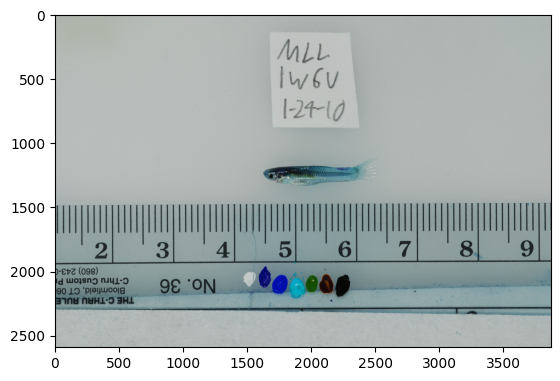

In [4]:
decoded = np.frombuffer(image_in_bytes.getvalue(), dtype=np.uint8)
frame = cv2.imdecode(decoded, cv2.IMREAD_COLOR) 
plt.imshow(frame)
print(random_files[8])

(upper thresh, lower_thresh) = (186.45, 72.00)


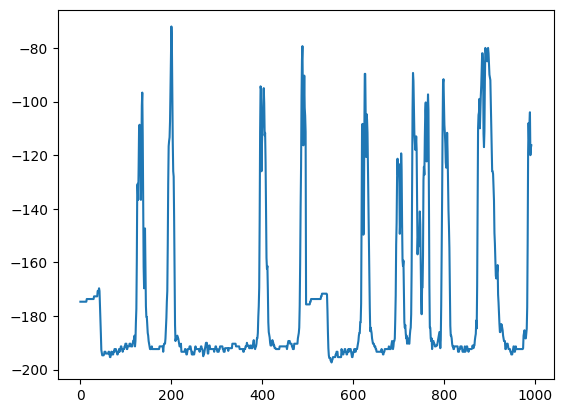

In [5]:
# Average out the RGB axis
averaged_frame = np.mean(reduced_frame,axis=2)

# White background masking
hist = np.histogram(averaged_frame, bins=100)
centers = 0.5*(hist[1][1:]+ hist[1][:-1])

thresh_val = np.argmax(hist[0] > np.max(hist[0]) * 0.2)
upper_thresh = centers[thresh_val] * 0.975

# Dark writing masking. Mask based on central row of frame
frame_shape = np.shape(averaged_frame)
row1 = -averaged_frame[2 * frame_shape[0] // 5][00:-200]
row2 = -averaged_frame[3 * frame_shape[0] // 5][00:-200]
rows = np.concatenate((row1, row2))
# rows = row2 = -averaged_frame[1]
row_mean = np.mean(rows)
row_max = np.max(rows)
row_min = np.min(rows)
peaks,_ = scipy.signal.find_peaks(rows, height = row_mean + ((row_max - row_min) / 5), distance=4)

values = []
for peak in peaks:
    values.append(-rows[peak])

sorted_values = np.sort(values)

lower_thresh = sorted_values[0] * 1

averaged_frame[averaged_frame>upper_thresh] = 0
averaged_frame[averaged_frame<lower_thresh] = 0
averaged_frame[averaged_frame!=0] = 255

plt.plot(rows)
# plt.imshow(averaged_frame)
print('(upper thresh, lower_thresh) = (%.2f, %.2f)' %(upper_thresh, lower_thresh))

186.45250000000001

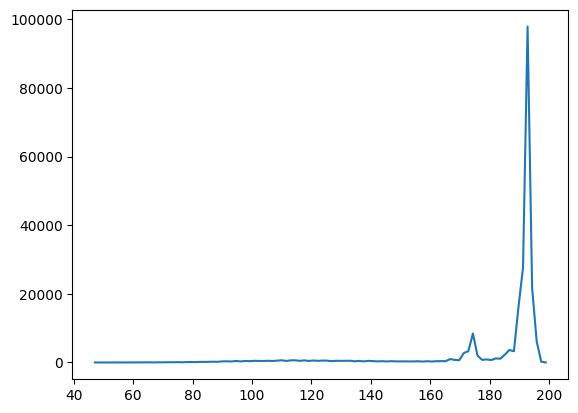

In [6]:
averaged_frame = np.mean(reduced_frame,axis=2)

# White background masking
hist = np.histogram(averaged_frame, bins=100)
centers = 0.5*(hist[1][1:]+ hist[1][:-1])

thresh = np.argmax(hist[0] > np.max(hist[0]) * 0.2)
upper_thresh = centers[thresh_val] * 0.975

# averaged_frame = np.mean(reduced_frame,axis=2)
# hist = np.histogram(averaged_frame, bins=1000)
# centers = 0.5*(hist[1][1:]+ hist[1][:-1])

# thresh = np.argmax(hist[0] > np.max(hist[0]) * 0.2)
# centers[thresh] * 0.975

plt.plot(centers, hist[0])
centers[thresh] * 0.975

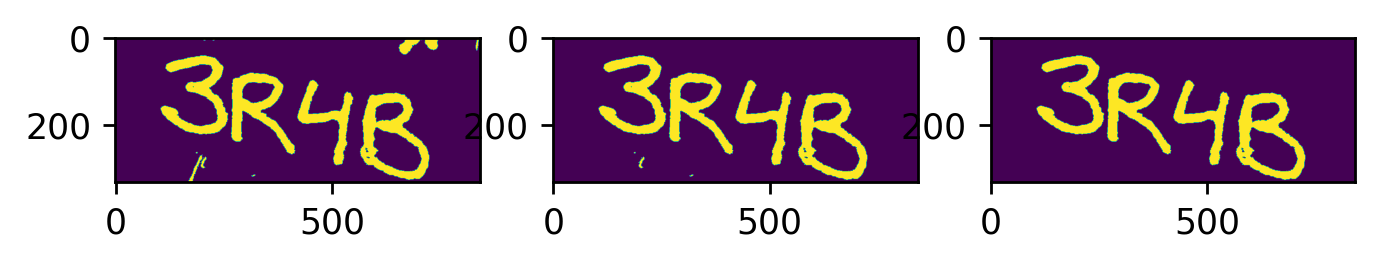

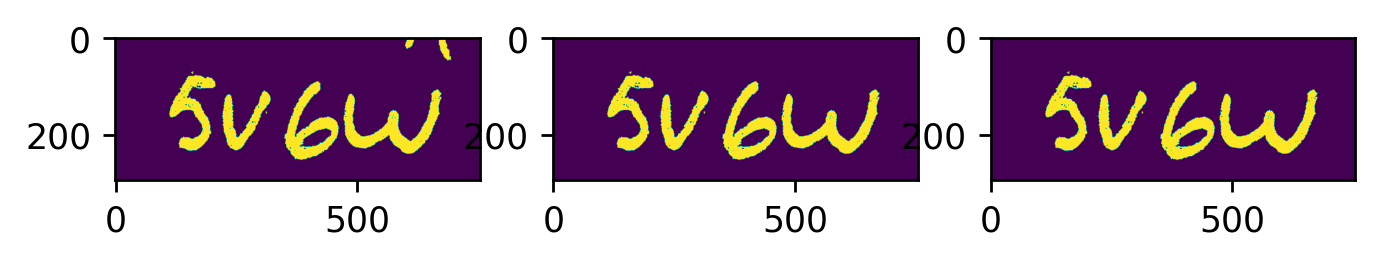

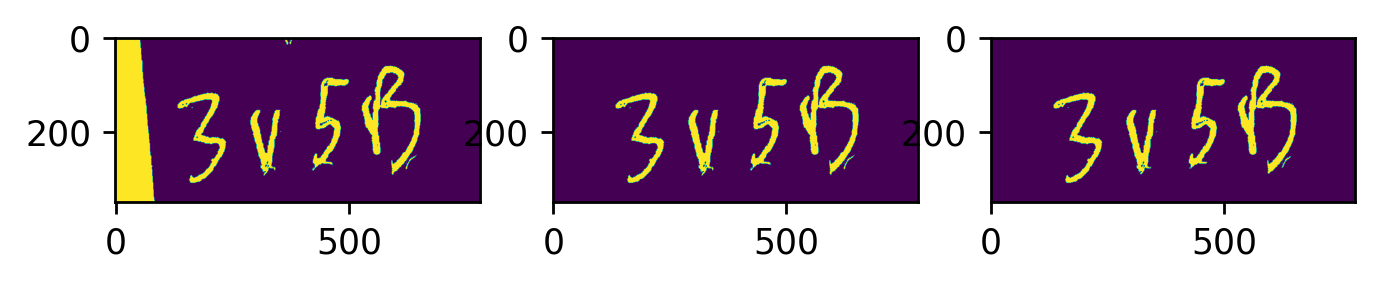

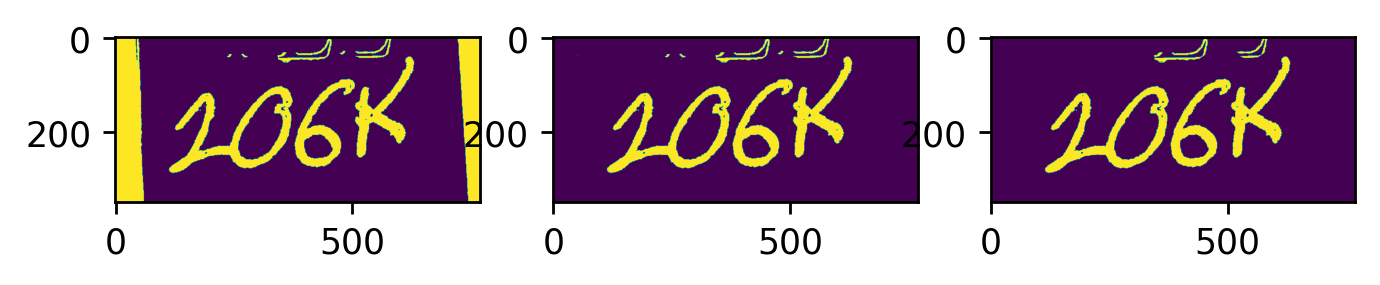

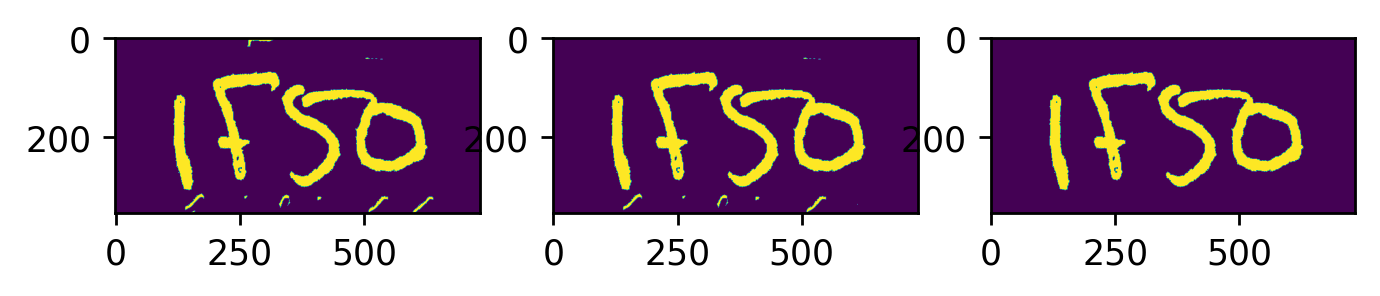

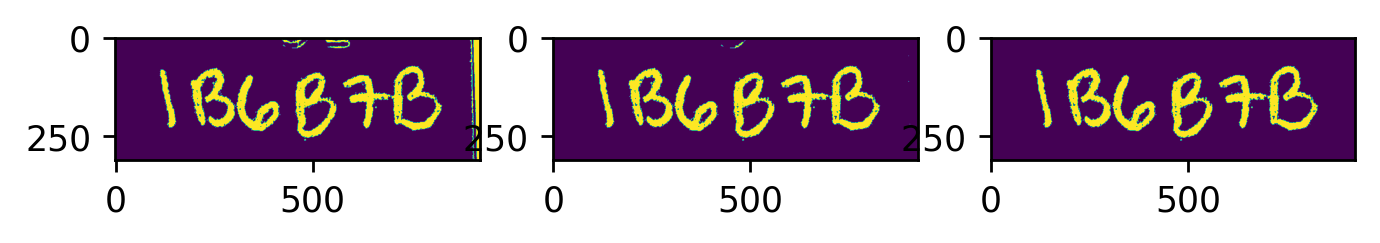

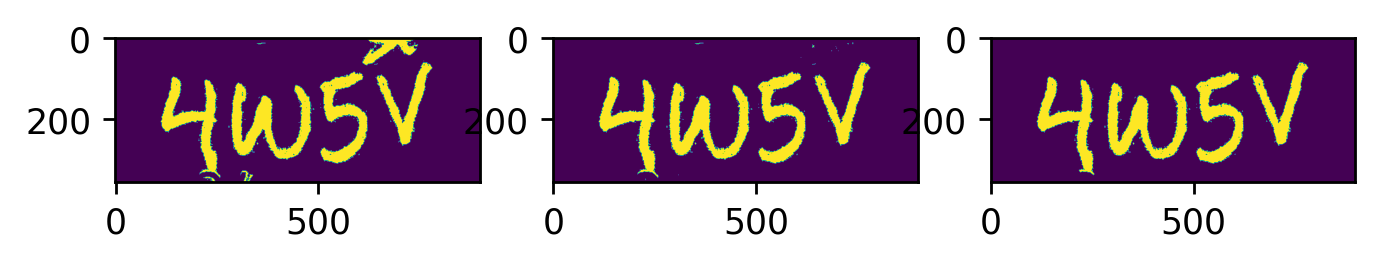

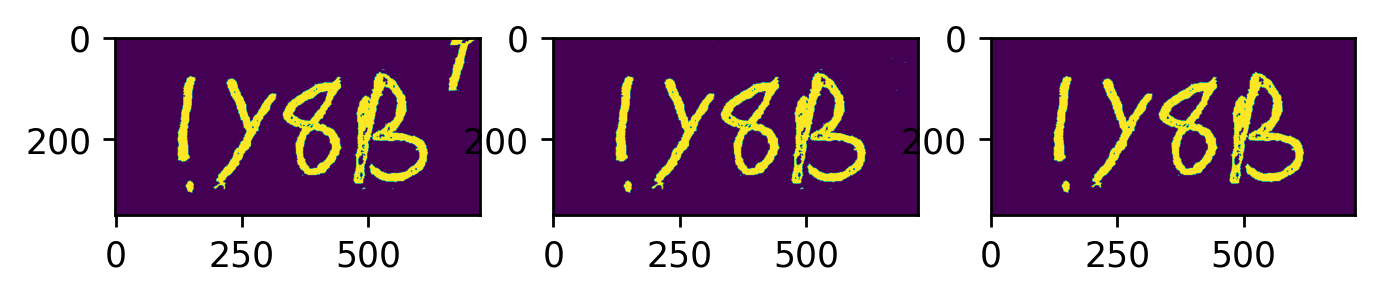

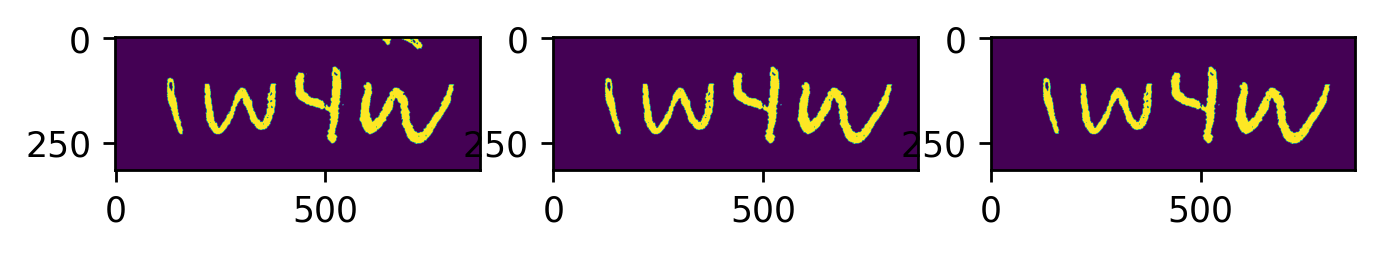

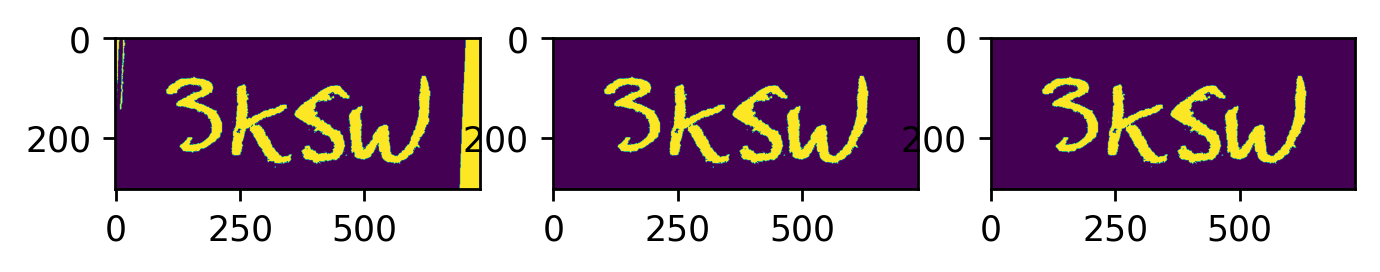

In [10]:
%matplotlib inline
padx = 100
pady = 80
for i in range(10):
    try:
        # Collect image from bucket
        image_in_bytes = RetreiveImage(random_files[i])

        # Read image and return initial output, frame and identity character boxes
        output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=False)

        # Collect character boxes into a singe ID box.
        identity_box = combine_boxes(character_boxes)

        # Reduce the image to just the ID
        reduced_frame = reduce_image(frame, identity_box, padx=padx, pady=pady)

        # Mask and remove for final image
        masked_image = mask_and_remove(reduced_frame, verbose = False)

        # Remove deltas
        final_image = remove_deltas(masked_image, width=15, padx=padx, pady=pady, verbose = True)
    
    except:
        pass

M pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:0
character: M upper height: 508 lower height: 389
T pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:1
character: T upper height: 514 lower height: 395
Y pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:2
character: Y upper height: 519 lower height: 399
3 pageno:0 blockno:0 paragraphno:0 wordno:1 symbolno:0
character: 3 upper height: 685 lower height: 514
W pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:0
character: W upper height: 691 lower height: 519
4 pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:1
character: 4 upper height: 698 lower height: 526
B pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:2
character: B upper height: 701 lower height: 530
9 pageno:0 blockno:0 paragraphno:0 wordno:3 symbolno:0
character: 9 upper height: 845 lower height: 726
/ pageno:0 blockno:0 paragraphno:0 wordno:3 symbolno:1
character: / upper height: 848 lower height: 730
2 pageno:0 blockno:0 paragraphno:0 wordno:3 symbolno:2
character

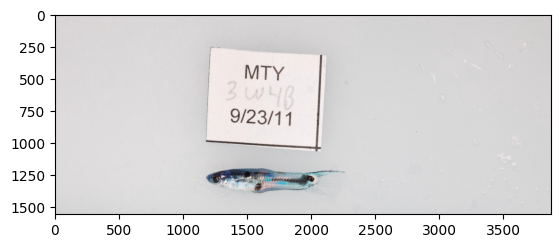

In [8]:
# Collect image from bucket
image_in_bytes = RetreiveImage(random_files[102])

# Read image and return initial output, frame and identity character boxes
output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=True)

# Collect character boxes into a singe ID box.
identity_box = combine_boxes(character_boxes)

In [20]:
client = vision.ImageAnnotatorClient()
fig,ax = plt.subplots(10,10, figsize=(20,20))
padx = 100
pady = 80

i = 0
j = 0

while i < 100:
    try:
        # Collect image from bucket
        image_in_bytes = RetreiveImage(random_files[j])

        # Read image and return initial output, frame and identity character boxes
        output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=False)

        # Collect character boxes into a singe ID box.
        identity_box = combine_boxes(character_boxes, added_length=100)

        # Reduce the image to just the ID
        reduced_frame = reduce_image(frame, identity_box, padx=padx, pady=pady)

        # Mask and remove for final image
        masked_image = mask_and_remove(reduced_frame, verbose = False)

        # Remove deltas
        if len(character_boxes) == 3:
            final_image = remove_deltas(masked_image, width=15, padx=padx + 80, pady=pady//2, verbose = False)

        else:
            final_image = remove_deltas(masked_image, width=15, padx=padx, pady=pady//2, verbose = False)

        shape = np.shape(final_image)
        counts = np.count_nonzero(final_image)
        valid_test = counts / (shape[0] * shape[1])

        if valid_test > 0.065 and shape[0] > 250 and shape[1] < 1000:
            ax[i // 10, i % 10].imshow(final_image)
            ax[i // 10, i % 10].set_title('index %i' %j)

            print(j, valid_test)

            i += 1
            j += 1

        else:
            j += 1
            
    except:
        j += 1
        pass

0 0.14550372307736284
1 0.11743929359823399
2 0.07320698625046451
3 0.11151240690145589
4 0.114809109487243
5 0.11884275064446458
6 0.1437005649717514
7 0.1118401266323704
8 0.08953915283029207
9 0.11824006411555207
